In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.optimize import curve_fit

In [2]:
# Load the dataset
file_path = 'Store_CA.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue
0,581,29,1723,186,84.9,1,12,6,108.3,Los Angeles,Electronics,284.90
1,382,31,1218,427,75.8,18,11,6,97.8,Los Angeles,Electronics,308.21
2,449,35,2654,142,92.8,14,11,6,101.1,Los Angeles,Grocery,292.11
3,666,9,2591,159,66.3,11,11,4,115.1,Sacramento,Clothing,279.61
4,657,35,2151,275,89.1,28,12,7,93.4,Palo Alto,Electronics,359.71


In [3]:
data.isnull().sum()

ProductVariety         0
MarketingSpend         0
CustomerFootfall       0
StoreSize              0
EmployeeEfficiency     0
StoreAge               0
CompetitorDistance     0
PromotionsCount        0
EconomicIndicator      0
StoreLocation          0
StoreCategory          0
MonthlySalesRevenue    0
dtype: int64

In [5]:
# Display Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProductVariety       1650 non-null   int64  
 1   MarketingSpend       1650 non-null   int64  
 2   CustomerFootfall     1650 non-null   int64  
 3   StoreSize            1650 non-null   int64  
 4   EmployeeEfficiency   1650 non-null   float64
 5   StoreAge             1650 non-null   int64  
 6   CompetitorDistance   1650 non-null   int64  
 7   PromotionsCount      1650 non-null   int64  
 8   EconomicIndicator    1650 non-null   float64
 9   StoreLocation        1650 non-null   object 
 10  StoreCategory        1650 non-null   object 
 11  MonthlySalesRevenue  1650 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 154.8+ KB


In [6]:
# Describe function
data.describe()

,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,MonthlySalesRevenue
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,500.915758,27.460000,2020.028485,272.997576,72.198545,15.447879,9.933939,5.500606,99.761939,299.253285
std,148.054223,13.014753,484.025786,131.048595,13.019817,8.667779,3.117450,1.388356,14.614712,65.543755
min,100.000000,5.000000,500.000000,50.000000,50.000000,1.000000,1.000000,3.000000,60.000000,106.710000
25%,396.000000,17.000000,1691.000000,156.000000,61.000000,8.000000,8.000000,4.000000,90.000000,254.125000
50%,500.500000,27.000000,2021.000000,273.000000,72.100000,16.000000,10.000000,5.000000,100.300000,297.440000
75%,602.750000,38.000000,2350.750000,385.500000,83.100000,23.000000,12.000000,7.000000,109.600000,344.222500
max,1092.000000,50.000000,3627.000000,500.000000,94.900000,30.000000,20.000000,8.000000,140.000000,534.260000


In [7]:
# Skewness
data.skew(numeric_only=True)

ProductVariety         0.063616
MarketingSpend        -0.003017
CustomerFootfall       0.017122
StoreSize              0.012431
EmployeeEfficiency     0.031078
StoreAge               0.000630
CompetitorDistance     0.004960
PromotionsCount       -0.004658
EconomicIndicator     -0.070301
MonthlySalesRevenue    0.082743
dtype: float64

In [8]:
# Kurtosis
data.kurtosis(numeric_only=True)

ProductVariety        -0.058017
MarketingSpend        -1.191257
CustomerFootfall      -0.030402
StoreSize             -1.214322
EmployeeEfficiency    -1.177286
StoreAge              -1.199293
CompetitorDistance    -0.015726
PromotionsCount       -0.923991
EconomicIndicator     -0.116113
MonthlySalesRevenue   -0.242951
dtype: float64

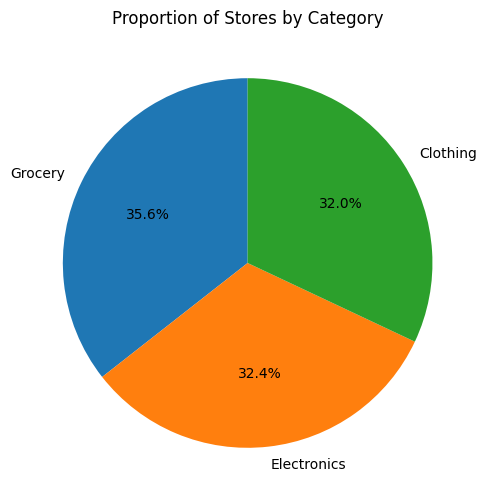

In [ ]:
def pie_plot(data):
    plt.figure(figsize=(8, 6))
    store_counts = data['StoreCategory'].value_counts()
    store_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Proportion of Stores by Category')
    plt.ylabel('') 
    plt.show()

pie_plot(data)

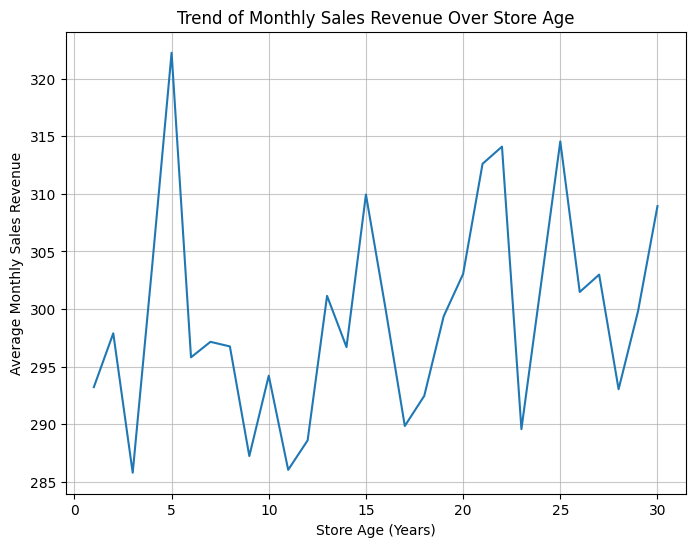

In [ ]:
def line_plot(data): 
    # Group the data
    store_age_trend = data.groupby('StoreAge')['MonthlySalesRevenue'].mean()

    plt.figure(figsize=(8, 6))
    store_age_trend.plot(kind='line')
    plt.title('Trend of Monthly Sales Revenue Over Store Age')
    plt.xlabel('Store Age (Years)')
    plt.ylabel('Average Monthly Sales Revenue')
    plt.grid(axis='both', alpha=0.7)
    plt.show()

line_plot(data)


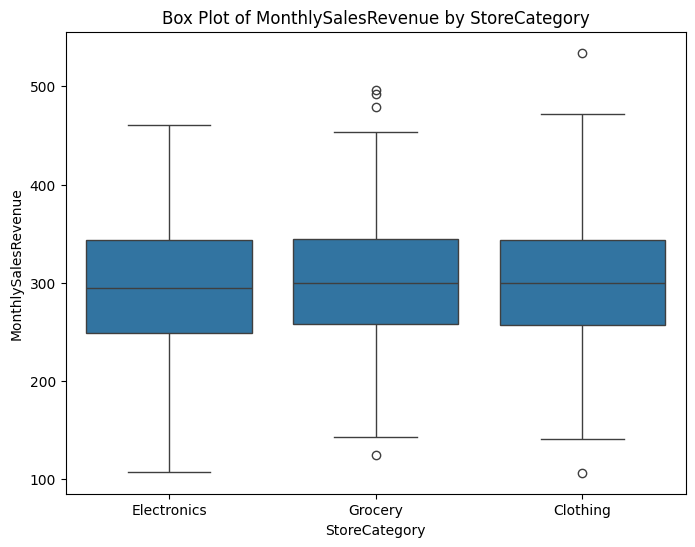

In [ ]:
def box_plot(column_name, category_col):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[category_col], y=data[column_name])
    plt.title(f'Box Plot of {column_name} by {category_col}')
    plt.xlabel(category_col)
    plt.ylabel(column_name)
    plt.show()

box_plot('MonthlySalesRevenue', 'StoreCategory')

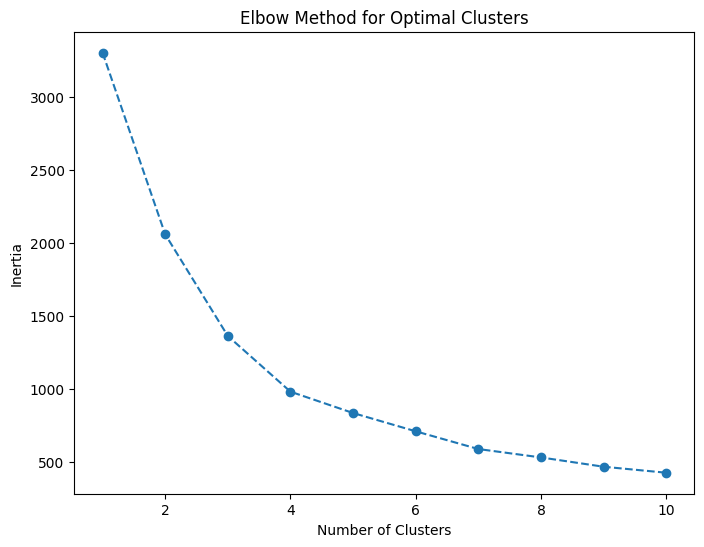

In [ ]:
def elbow_plot(feature1, feature2, max_clusters=10):
    data_subset = data[[feature1, feature2]].copy()
    
    # Scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_subset)
    
    # Calculate inertia for different cluster counts
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)
    
    # Plot the Elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

elbow_plot('MarketingSpend', 'MonthlySalesRevenue')

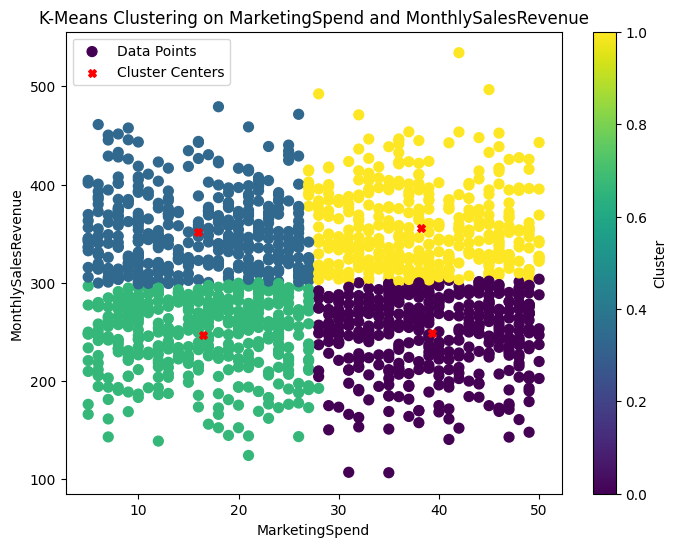

In [10]:
# Function to perform K-Means clustering on two features and display cluster centers
def kmeans_clustering(feature1, feature2, n_clusters):
    # Extract the two features
    data_subset = data[[feature1, feature2]].copy()
    
    # Scale the data for clustering
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_subset)
    
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data_subset['Cluster'] = kmeans.fit_predict(scaled_data)
    
    # Extract cluster centers and reverse scaling for visualization
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(
        data_subset[feature1], 
        data_subset[feature2], 
        c=data_subset['Cluster'],
        s=50,
        label='Data Points'
    )
    plt.scatter(
        cluster_centers[:, 0], 
        cluster_centers[:, 1], 
        c='red', 
        marker='X', 
        s=30, 
        label='Cluster Centers'
    )
    plt.title(f'K-Means Clustering on {feature1} and {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.colorbar(label='Cluster')
    plt.show()
    
    return kmeans

kmeans_model = kmeans_clustering('MarketingSpend', 'MonthlySalesRevenue', n_clusters=4)

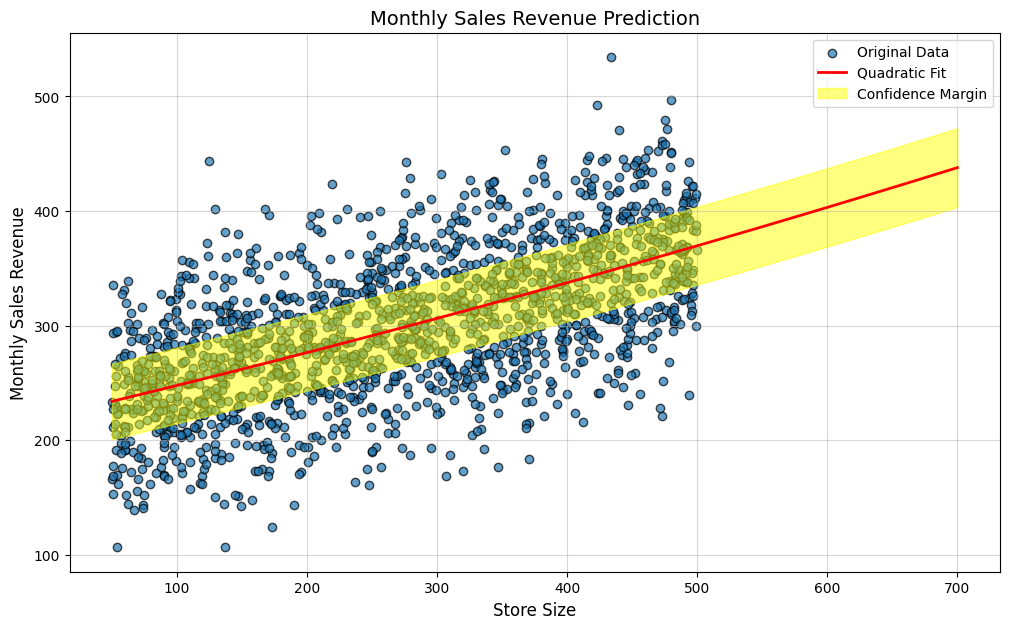

In [ ]:
# Define the quadratic function
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Function to perform curve fitting and plot the result
def curve_fitting_and_plot(x_col, y_col):
    # Select the independent and dependent variables
    x_data_store_size = data[x_col]
    y_data_sales = data[y_col]

    # Fit the quadratic model
    params, cov = curve_fit(quadratic, x_data_store_size, y_data_sales, maxfev=10000)

    # Calculate confidence intervals
    perr_store_size = np.diag(cov)
    future_x_store_size = np.linspace(min(x_data_store_size), 700, 300)
    future_y_quad_store_size = quadratic(future_x_store_size, *params)
    upper_confidence_store_size = quadratic(future_x_store_size, *(params + perr_store_size))
    lower_confidence_store_size = quadratic(future_x_store_size, *(params - perr_store_size))

    # Plot the results
    plt.figure(figsize=(12, 7))
    plt.scatter(x_data_store_size, y_data_sales, alpha=0.7, label='Original Data', edgecolors='k')
    plt.plot(future_x_store_size, future_y_quad_store_size, 'r-', label='Quadratic Fit', linewidth=2)
    plt.fill_between(future_x_store_size, lower_confidence_store_size, upper_confidence_store_size, color='yellow', alpha=0.5, label='Confidence Margin')
    plt.title('Monthly Sales Revenue Prediction', fontsize=14)
    plt.xlabel('Store Size', fontsize=12)
    plt.ylabel('Monthly Sales Revenue', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.show()

curve_fitting_and_plot('StoreSize', 'MonthlySalesRevenue')
